<h3>Install Library Open CV dan imutils</h3>

In [ ]:
!pip install opencv-python
!pip install imutils

<h3>Import library</h3>

In [16]:
import keras
import cv2
import random
import numpy as np
from imutils import paths

<h3>Load gambarnya</h3>

In [19]:
data = []
labels = []
imagePaths = sorted(list(paths.list_images('dataset/animals/')))
random.seed(2)
random.shuffle(imagePaths)

for imagePath in imagePaths:
    img = cv2.imread(imagePath)
    img_flat = cv2.resize(img, (32,32)).flatten()
    data.append(img_flat)    
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# ubah var data menjadi array numpy agar bisa dilakukan matrix manipulation    
lbl = np.array(labels)
dt = np.array(data, dtype='float32')
print('gambar loaded')

gambar loaded


In [33]:
32*32 * 3

3072

<h3>Lihat salah satu gambarnya</h3>

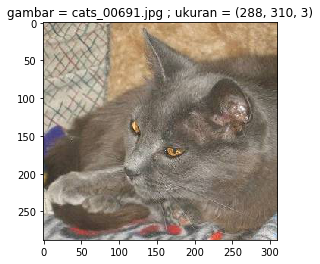

In [20]:
import matplotlib.pyplot as plt
gambar = imagePaths[2]
gbr = plt.imread(gambar)
plt.title('gambar = '+str(gambar.split('/')[3])+' ; ukuran = '+str(gbr.shape))
plt.imshow(gbr)

<h3>Cek ukuran / dimensi gambarnya berapa</h3>

In [42]:
print('dimensi : ', dt.shape)
print()
print('jumlah gambar  : ', dt.shape[0])
print('Ukuran gambar  : ', dt.shape[1])
print()

dimensi :  (3000, 3072)

jumlah gambar  :  3000
Ukuran gambar  :  3072



3072 didapatkan dari 32 x 32 x 3

<h4>pecah data yang sudah diload tadi menjadi 2 bagian yaitu</h4>
<h4>1) bagian train</h4>
<li>X Train</li>
<li>Y Train</li>
<h4>2) bagian Test</h4>
<li>X Test</li>
<li>Y Test</li>
<h5>X = data input ; Y = label/output</h5>

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dt, lbl, 
                                                    test_size=0.25, 
                                                    random_state=42)

print('x_train : ',x_train.shape)
print('x_test  : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test  : ', y_test.shape)

x_train :  (2250, 3072)
x_test  :  (750, 3072)
y_train :  (2250,)
y_test  :  (750,)


<h3>Lakukan one hot enconding</h3>

In [31]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded = lb.transform(y_test)
y_test_encoded

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

<h3>Buat layer NN sederhana saja</h3>
<img src="arsitektur_nn_sederhana.png" height="800" width="350">

In [10]:
# import layer nya
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation='sigmoid', name='hidden_layer_1'))
model.add(Dense(512, activation='sigmoid', name='hidden_layer_2'))
model.add(Dense(3, name='output', activation='softmax'))
model.summary()

<h3> Atur jenis loss function, optimizer dan metrics </h3>

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

<h3> Mulai training dengan 20 iterasi </h3>

In [12]:
my_model = model.fit(x_train, y_train_encoded, 
                     validation_data=(x_test, y_test_encoded),
                     batch_size=32, 
                     epochs=20)

Train on 2250 samples, validate on 750 samples
Epoch 1/20
2250/2250 [==============================] - 3s 1ms/step - loss: 1.0916 - acc: 0.3684 - val_loss: 1.0776 - val_acc: 0.4000
Epoch 2/20
2250/2250 [==============================] - 2s 856us/step - loss: 1.0564 - acc: 0.4791 - val_loss: 1.0549 - val_acc: 0.4453
Epoch 3/20
2250/2250 [==============================] - 2s 945us/step - loss: 1.0300 - acc: 0.5173 - val_loss: 1.0330 - val_acc: 0.4960
Epoch 4/20
2250/2250 [==============================] - 2s 846us/step - loss: 1.0093 - acc: 0.5533 - val_loss: 1.0204 - val_acc: 0.5093
Epoch 5/20
2250/2250 [==============================] - 2s 857us/step - loss: 0.9918 - acc: 0.5711 - val_loss: 1.0091 - val_acc: 0.4893
Epoch 6/20
2250/2250 [==============================] - 2s 887us/step - loss: 0.9783 - acc: 0.5804 - val_loss: 1.0053 - val_acc: 0.5067
Epoch 7/20
2250/2250 [==============================] - 2s 950us/step - loss: 0.9658 - acc: 0.5902 - val_loss: 0.9877 - val_acc: 0.5160
Epo

<h3> Lihat grafik akurasi dan loss nya </h3>

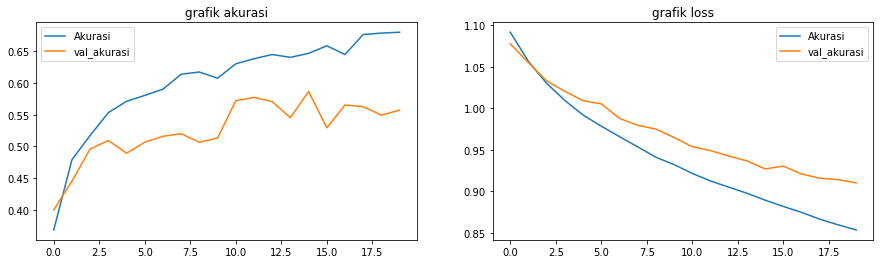

In [13]:
akurasi = my_model.history['acc']
val_akurasi = my_model.history['val_acc']

loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

x = np.arange(len(akurasi))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('grafik akurasi')
plt.plot(x, akurasi, label='Akurasi')
plt.plot(x, val_akurasi, label='val_akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.title('grafik loss')
plt.plot(x, loss, label='Akurasi')
plt.plot(x, val_loss, label='val_akurasi')
plt.legend()

plt.show()

### Simpan model dan label

In [ ]:
import pickle

model.save('model_sederhana.h5')
f = open('lable.pickle', 'wb')
f.write(pickle.dumps(lb))

### Test prediksi 1 gambar

In [34]:
prediksi = model.predict_classes(x_test)
b = np.expand_dims(x_test[0], axis = 0)
hasil_pred = model.predict(b)
lb.classes_[np.argmax(hasil_pred, axis=1)[0]]

'cats'

### Lihat hasil ujiannya (evaluation)

In [41]:
from sklearn.metrics import classification_report
akurasi = model.evaluate(x_test, y_test_encoded)[0]
loss = model.evaluate(x_test, y_test_encoded)[1]
print()
print('akurasi : %.2f%%' % akurasi)
print('loss    : %.2f%%' % loss)
print()
print(classification_report(y_test_encoded.argmax(axis = 1), prediksi))

750/750 [==============================] - 0s 234us/step

akurasi : 0.91%
loss    : 0.56%

             precision    recall  f1-score   support

          0       0.44      0.51      0.47       241
          1       0.56      0.38      0.45       262
          2       0.67      0.79      0.72       247

avg / total       0.56      0.56      0.55       750



<br />

<br />

<br />

<br />

<br />